![](https://api.brandy.run/core/core-logo-wide)

# Unsupervised Learning pt. II

En esa clase, usaremos técnicas de Unsupervised Learning para investigar un dataset famoso llamado `Bread Basket` que contiene registros de ventas de una panaderia de mismo nombre en Escócia.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sys import getsizeof
df = pd.read_csv("./bakery.csv")
getsizeof(df)/1024/1024

4.132086753845215

In [3]:
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [4]:
# nulls?
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [5]:
# dtypes
df.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [6]:
## Change Date + Time into datetime
df["Date"] + " " + df["Time"]

0        2016-10-30 09:58:11
1        2016-10-30 10:05:34
2        2016-10-30 10:05:34
3        2016-10-30 10:07:57
4        2016-10-30 10:07:57
                ...         
21288    2017-04-09 14:32:58
21289    2017-04-09 14:32:58
21290    2017-04-09 14:57:06
21291    2017-04-09 14:57:06
21292    2017-04-09 15:04:24
Length: 21293, dtype: object

In [7]:
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.head()

,Date,Time,Transaction,Item,DateTime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [8]:
df.dtypes

Date                   object
Time                   object
Transaction             int64
Item                   object
DateTime       datetime64[ns]
dtype: object

In [9]:
## Drop redundancy
df = df.drop(columns=["Date","Time"])

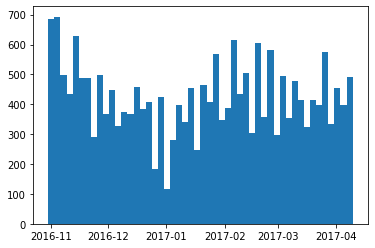

In [10]:
plt.hist(df["DateTime"],bins=50);

In [11]:
# Investigate items
df["Item"].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [12]:
len(df["Item"].unique())

95

In [13]:
## Categorize
groups = {
    "beverage":['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies'],
    "kids":["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit'],
    "snacks":['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars'],
    "bread":['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian'],
    "breakfast_pastry":['Muffin', 'Pastry', 'Medialuna', 'Scone'],
    "dessert":['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone'],
    "condiments":['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil'],
    "breakfast":['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami'],
    "lunch":['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
}

In [14]:
# function
def categorize(product):
    for k,v in groups.items():
        if product in v:
            return k
    return "other"

In [15]:
# apply it
df["category"] = df["Item"].apply(categorize)

In [16]:
df

,Transaction,Item,DateTime,category
0,1,Bread,2016-10-30 09:58:11,bread
1,2,Scandinavian,2016-10-30 10:05:34,bread
2,2,Scandinavian,2016-10-30 10:05:34,bread
3,3,Hot chocolate,2016-10-30 10:07:57,beverage
4,3,Jam,2016-10-30 10:07:57,condiments
...,...,...,...,...
21288,9682,Coffee,2017-04-09 14:32:58,beverage
21289,9682,Tea,2017-04-09 14:32:58,beverage
21290,9683,Coffee,2017-04-09 14:57:06,beverage
21291,9683,Pastry,2017-04-09 14:57:06,breakfast_pastry


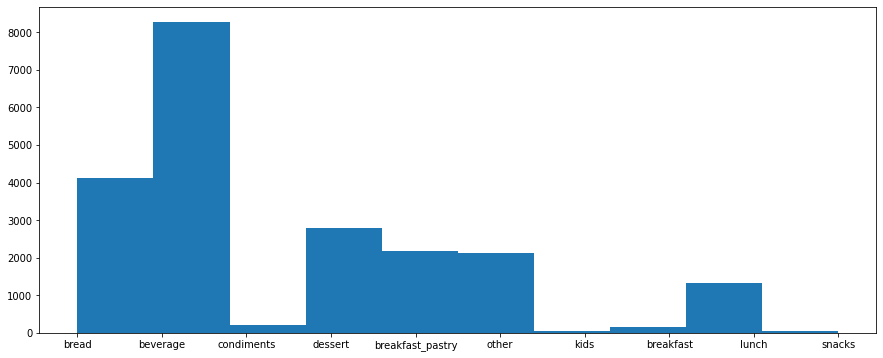

In [17]:
plt.figure(figsize=(15,6))
plt.hist(df["category"]);

In [18]:
# Dummies!
breadbasket = pd.get_dummies(df.drop(columns=["Item"]), prefix="", prefix_sep="")

In [19]:
breadbasket

,Transaction,DateTime,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
0,1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0
1,2,2016-10-30 10:05:34,0,1,0,0,0,0,0,0,0,0
2,2,2016-10-30 10:05:34,0,1,0,0,0,0,0,0,0,0
3,3,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0
4,3,2016-10-30 10:07:57,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21288,9682,2017-04-09 14:32:58,1,0,0,0,0,0,0,0,0,0
21289,9682,2017-04-09 14:32:58,1,0,0,0,0,0,0,0,0,0
21290,9683,2017-04-09 14:57:06,1,0,0,0,0,0,0,0,0,0
21291,9683,2017-04-09 14:57:06,0,0,0,1,0,0,0,0,0,0


In [20]:
# Join products by transaction
# tickets
tickets = df.groupby(["Transaction","DateTime"]).agg({"Item":lambda x: list(x)})
print(tickets.shape)
tickets.head()

(9531, 1)


,,Item
Transaction,DateTime,
1,2016-10-30 09:58:11,[Bread]
2,2016-10-30 10:05:34,"[Scandinavian, Scandinavian]"
3,2016-10-30 10:07:57,"[Hot chocolate, Jam, Cookies]"
4,2016-10-30 10:08:41,[Muffin]
5,2016-10-30 10:13:03,"[Coffee, Pastry, Bread]"


In [21]:
# Categories
breadbasket = breadbasket.groupby(["Transaction","DateTime"]).sum()

In [22]:
breadbasket

,,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,DateTime,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,1,0,0,0,0,0,0,0,0
9681,2017-04-09 14:30:09,1,0,0,0,0,1,0,0,2,0
9682,2017-04-09 14:32:58,2,0,0,1,0,0,0,0,1,0


### Inertia Curve and Silhouette score

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
# KMeans
kmeans = [KMeans(k).fit(breadbasket) for k in range(1,21)]

In [25]:
inertias = [km.inertia_ for km in kmeans]

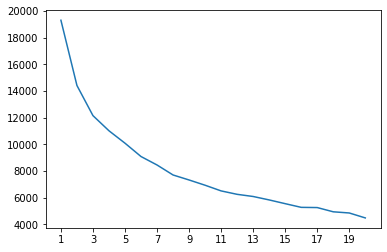

In [26]:
plt.plot(range(1,21),inertias)
plt.xticks(range(1,21,2));

In [27]:
# Silhouette
silhouettes = [silhouette_score(breadbasket, km.labels_) for km in kmeans[1:]]

Text(0.5, 0, 'k (number of clusters)')

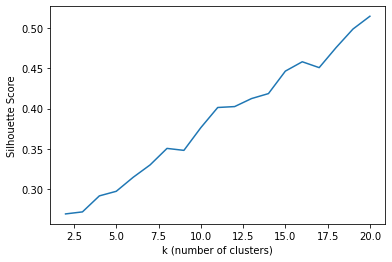

In [28]:
plt.plot(range(2,21),silhouettes)
plt.ylabel("Silhouette Score")
plt.xlabel("k (number of clusters)")

In [29]:
kmeans = [KMeans(k).fit(breadbasket) for k in range(1,101)]
silhouettes = [silhouette_score(breadbasket, km.labels_) for km in kmeans[1:]]

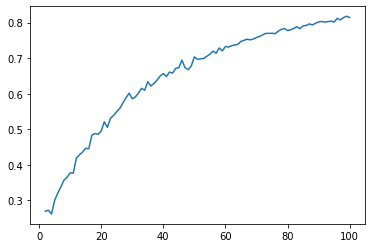

In [30]:
plt.plot(range(2,101),silhouettes)

In [31]:
from sklearn.cluster import DBSCAN

num_trains = 10
eps_space_X = np.linspace(0.5,1,num_trains)
dbscan_models = [DBSCAN(eps=eps).fit(breadbasket) for eps in eps_space_X]
#[np.unique(model.labels_) for model in dbscan_models]

In [32]:
[np.unique(model.labels_) for model in dbscan_models]

[array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]),
 array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  

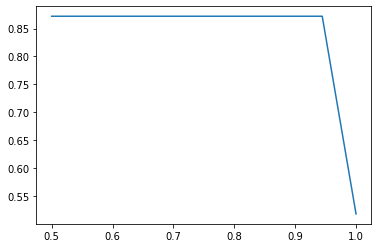

In [33]:
silhouettes = [silhouette_score(breadbasket, km.labels_) for km in dbscan_models]
plt.plot(eps_space_X,silhouettes)

## Conclusion

No podemos clusterizar los datos tal cual los teniamos

In [34]:
## Get better data
breadbasket.head()

,,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,DateTime,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0


In [35]:
breadbasket = breadbasket.reset_index(level="DateTime")
breadbasket.head()

,DateTime,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0


In [36]:
breadbasket["week_day"] = breadbasket["DateTime"].dt.dayofweek
breadbasket.head()

,DateTime,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,week_day
Transaction,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0,6
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0,6
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0,6
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0,6
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0,6


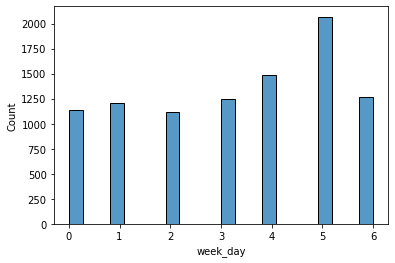

In [37]:
sns.histplot(breadbasket["week_day"]);

In [38]:
breadbasket["hour"] = breadbasket["DateTime"].dt.hour

In [39]:
breadbasket.head()

,DateTime,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,week_day,hour
Transaction,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0,6,9
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0,6,10
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0,6,10
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0,6,10
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0,6,10


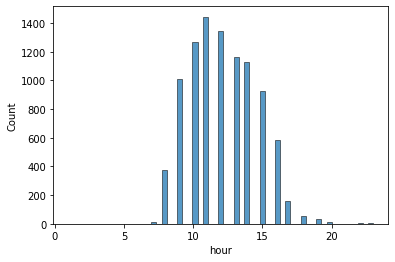

In [40]:
sns.histplot(breadbasket["hour"]);

In [41]:
sales = breadbasket.drop(columns=["DateTime"])
sales.head()

,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,week_day,hour
Transaction,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,6,9
2,0,2,0,0,0,0,0,0,0,0,6,10
3,1,0,0,0,1,1,0,0,0,0,6,10
4,0,0,0,1,0,0,0,0,0,0,6,10
5,1,1,0,1,0,0,0,0,0,0,6,10


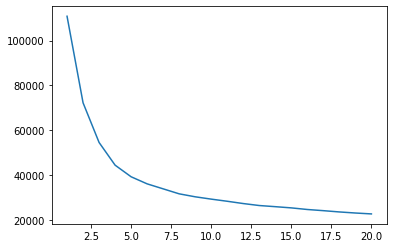

In [42]:
# KMeans
kmeans = [KMeans(k).fit(sales) for k in range(1,21)]
inertias = [km.inertia_ for km in kmeans]
plt.plot(range(1,21),inertias)

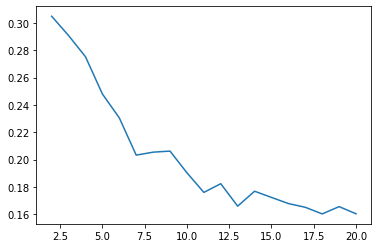

In [43]:
# Sillhouette
silhouettes = [silhouette_score(sales, km.labels_) for km in kmeans[1:]]
plt.plot(range(2,21),silhouettes)

In [44]:
num_trains = 10
eps_space_X = np.linspace(0.5,1.5,num_trains)
dbscan_models = [DBSCAN(eps=eps).fit(sales) for eps in eps_space_X]


In [45]:
[(len(np.unique(model.labels_)), model.eps) for model in dbscan_models]

[(460, 0.5),
 (460, 0.6111111111111112),
 (460, 0.7222222222222222),
 (460, 0.8333333333333333),
 (460, 0.9444444444444444),
 (3, 1.0555555555555556),
 (3, 1.1666666666666665),
 (3, 1.2777777777777777),
 (3, 1.3888888888888888),
 (2, 1.5)]

In [46]:
k = 6
predicted_cluster = kmeans[k-1].predict(sales)
#predicted_cluster = DBSCAN(eps=1.1).fit_predict(sales)

sales_predict = sales.copy() 
sales_predict["cluster"] = predicted_cluster
sales_predict.head()

,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,week_day,hour,cluster
Transaction,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,6,9,2
2,0,2,0,0,0,0,0,0,0,0,6,10,2
3,1,0,0,0,1,1,0,0,0,0,6,10,2
4,0,0,0,1,0,0,0,0,0,0,6,10,2
5,1,1,0,1,0,0,0,0,0,0,6,10,2


In [47]:
sales_predict[sales_predict["cluster"] == 1]

,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,week_day,hour,cluster
Transaction,,,,,,,,,,,,,
81,1,0,0,0,0,1,0,0,0,0,0,8,1
82,0,1,0,0,0,1,0,0,1,0,0,8,1
83,1,1,0,0,0,0,0,0,0,0,0,8,1
84,0,1,0,0,0,0,0,0,0,0,0,9,1
85,2,0,0,2,0,0,0,0,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9461,1,0,0,0,0,0,0,0,0,0,3,9,1
9462,2,0,0,0,0,0,0,0,0,0,3,10,1
9463,1,0,0,0,0,0,0,0,1,0,3,10,1


In [48]:
pd.crosstab(sales_predict["hour"],sales_predict["cluster"])

cluster,0,1,2,3,4,5
hour,,,,,,
1,0,0,1,0,0,0
7,0,14,2,0,0,0
8,0,202,173,0,0,0
9,0,512,495,0,0,0
10,0,593,674,0,0,0
11,0,0,780,665,0,0
12,0,0,0,669,0,678
13,0,0,0,425,0,738
14,0,0,0,0,400,730


In [49]:
pd.crosstab(sales_predict["week_day"],sales_predict["cluster"])

cluster,0,1,2,3,4,5
week_day,,,,,,
0,0,327,0,462,346,0
1,2,325,0,514,362,0
2,2,316,0,432,371,0
3,244,353,0,351,0,304
4,268,0,668,0,0,552
5,414,0,927,0,0,727
6,171,0,530,0,0,563


In [50]:
dummies = sales_predict.drop(columns=["week_day","hour","cluster"])
dummies

,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9680,0,1,0,0,0,0,0,0,0,0
9681,1,0,0,0,0,1,0,0,2,0
9682,2,0,0,1,0,0,0,0,1,0


In [51]:
dummies != 0

,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,,,,,,,,,,
1,False,True,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,True,False,False,False,True,True,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False
5,True,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9680,False,True,False,False,False,False,False,False,False,False
9681,True,False,False,False,False,True,False,False,True,False
9682,True,False,False,True,False,False,False,False,True,False


In [52]:
dummies.columns

Index(['beverage', 'bread', 'breakfast', 'breakfast_pastry', 'condiments',
       'dessert', 'kids', 'lunch', 'other', 'snacks'],
      dtype='object')

In [53]:
dummies.columns[[False,  True, False, False, False, False, False, False, False,False]]

Index(['bread'], dtype='object')

In [54]:
(dummies != 0).apply(lambda row: list(dummies.columns[row.values]),axis=1)

Transaction
1                                   [bread]
2                                   [bread]
3           [beverage, condiments, dessert]
4                        [breakfast_pastry]
5       [beverage, bread, breakfast_pastry]
                       ...                 
9680                                [bread]
9681             [beverage, dessert, other]
9682    [beverage, breakfast_pastry, other]
9683           [beverage, breakfast_pastry]
9684                             [beverage]
Length: 9531, dtype: object

In [55]:
sales_predict["category"] = (dummies != 0).apply(lambda row: list(dummies.columns[row.values]),axis=1)

In [56]:
sales_predict.head()

,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,week_day,hour,cluster,category
Transaction,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,6,9,2,[bread]
2,0,2,0,0,0,0,0,0,0,0,6,10,2,[bread]
3,1,0,0,0,1,1,0,0,0,0,6,10,2,"[beverage, condiments, dessert]"
4,0,0,0,1,0,0,0,0,0,0,6,10,2,[breakfast_pastry]
5,1,1,0,1,0,0,0,0,0,0,6,10,2,"[beverage, bread, breakfast_pastry]"


In [57]:
sales_predict = sales_predict.explode("category")

In [58]:
sales_predict

,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,week_day,hour,cluster,category
Transaction,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,6,9,2,bread
2,0,2,0,0,0,0,0,0,0,0,6,10,2,bread
3,1,0,0,0,1,1,0,0,0,0,6,10,2,beverage
3,1,0,0,0,1,1,0,0,0,0,6,10,2,condiments
3,1,0,0,0,1,1,0,0,0,0,6,10,2,dessert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9682,2,0,0,1,0,0,0,0,1,0,6,14,5,breakfast_pastry
9682,2,0,0,1,0,0,0,0,1,0,6,14,5,other
9683,1,0,0,1,0,0,0,0,0,0,6,14,5,beverage


In [59]:
pd.crosstab(sales_predict["category"],sales_predict["cluster"])

cluster,0,1,2,3,4,5
category,,,,,,
beverage,687,852,1242,1087,732,1321
bread,362,557,990,631,356,801
breakfast,19,9,31,23,6,72
breakfast_pastry,177,332,623,276,151,361
condiments,20,24,61,27,14,64
dessert,405,185,409,396,380,595
kids,14,4,11,4,6,6
lunch,97,22,56,316,164,458
other,208,214,418,357,169,530


In [60]:
vc = sales_predict.groupby("cluster")["category"].value_counts()
vc

cluster  category        
0        beverage             687
         dessert              405
         bread                362
         other                208
         breakfast_pastry     177
         lunch                 97
         condiments            20
         breakfast             19
         kids                  14
         snacks                 7
1        beverage             852
         bread                557
         breakfast_pastry     332
         other                214
         dessert              185
         condiments            24
         lunch                 22
         breakfast              9
         kids                   4
         snacks                 3
2        beverage            1242
         bread                990
         breakfast_pastry     623
         other                418
         dessert              409
         condiments            61
         lunch                 56
         breakfast             31
         kids         

In [61]:
prod_dist = pd.DataFrame(columns=sales_predict["cluster"].unique(), index=sales_predict["category"].unique())
for (col, ind), value in vc.iteritems():
    prod_dist.loc[ind,col] = value

In [62]:
prod_dist

,2,5,1,3,4,0
bread,990,801,557,631,356,362
beverage,1242,1321,852,1087,732,687
condiments,61,64,24,27,14,20
dessert,409,595,185,396,380,405
breakfast_pastry,623,361,332,276,151,177
other,418,530,214,357,169,208
kids,11,6,4,4,6,14
breakfast,31,72,9,23,6,19
lunch,56,458,22,316,164,97
snacks,3,21,3,8,6,7


In [63]:
prod_dist = pd.crosstab(sales_predict["category"],sales_predict["cluster"]).iloc[2:,:]
prod_dist

cluster,0,1,2,3,4,5
category,,,,,,
breakfast,19,9,31,23,6,72
breakfast_pastry,177,332,623,276,151,361
condiments,20,24,61,27,14,64
dessert,405,185,409,396,380,595
kids,14,4,11,4,6,6
lunch,97,22,56,316,164,458
other,208,214,418,357,169,530
snacks,7,3,3,8,6,21


<AxesSubplot:xlabel='cluster', ylabel='category'>

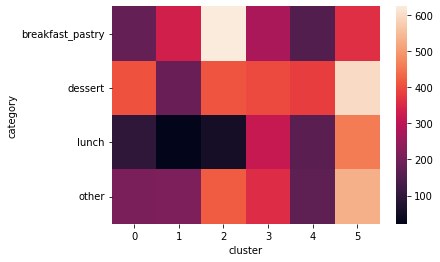

In [64]:
sns.heatmap(prod_dist.drop(index=["breakfast","condiments","kids","snacks"]))

In [65]:
sales

cluster,0,1,2,3,4,5
category,,,,,,
breakfast,19,9,31,23,6,72
breakfast_pastry,177,332,623,276,151,361
condiments,20,24,61,27,14,64
dessert,405,185,409,396,380,595
kids,14,4,11,4,6,6
lunch,97,22,56,316,164,458
other,208,214,418,357,169,530
snacks,7,3,3,8,6,21


In [66]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_small = pca.fit_transform(sales)

<AxesSubplot:>

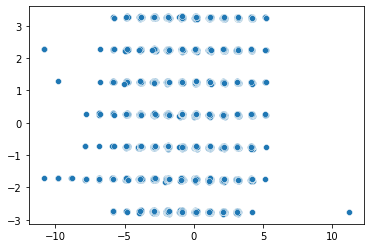

In [67]:
import seaborn as sns
sns.scatterplot(x=X_small[:,0],y=X_small[:,1],palette="deep")